## Logistic Regression

#### Importing Libraries

In [1]:
#importing the essential Libraries ->

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score , confusion_matrix
 
%matplotlib inline


#### Loading Dataset to model

In [45]:
# df - > Trained dataset
# df_test -> testing dataset

df = pd.read_csv("Titanic_train.csv")
df_test = pd.read_csv("Titanic_test.csv")

In [47]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [51]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [55]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [65]:
#drop down the unnecceaasry columns form dataset

df  = df.drop(["PassengerId" , "Name" , "Ticket" , "Cabin" , "Embarked"] , axis=1)


In [67]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [11]:
#to fill age column with certain value we need to analyse the age column

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


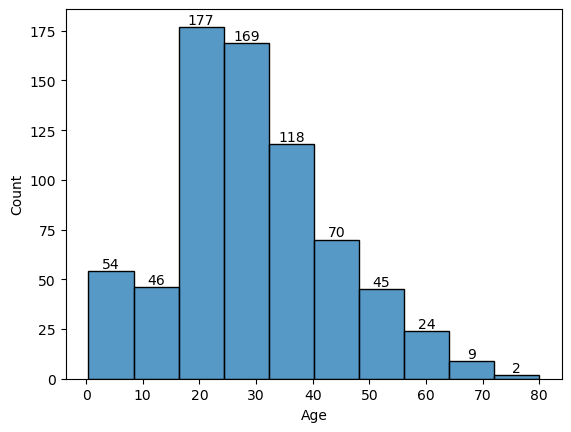

In [15]:
ax = sns.histplot(df["Age"] , bins=10)

for p in ax.patches:
    count = int(p.get_height())  # Get the height (count) of the bar
    x = p.get_x() + p.get_width() / 2  # Calculate the x-coordinate
    y = p.get_height()  # Calculate the y-coordinate
    ax.annotate(count, (x, y), ha='center', va='bottom')  # Add the text


In [69]:
#averaage age of female group

df.groupby("Sex")['Age'].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [73]:
#let put the missing values with above figure in data set
df["Age"] = df["Age"].fillna(df['Sex'].apply(lambda sex : 30 if sex == 'male' else 27))

In [84]:
df["Age"].isnull().sum()
    

0

In [86]:
df.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

#### Clean dataset without any null values

In [91]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


#### Encoding the columns 

In [95]:
df["sex_trial"] = df["Sex"].apply(lambda x: 1 if x=='male' else 0)

In [101]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,sex_trial
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1


In [108]:
df["Sex"] = df["sex_trial"]

In [112]:
df.drop("sex_trial" , axis=1 , inplace=True)

In [114]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500


In [116]:
# finding correlation among the columns

df_corr = df.corr()

<Axes: >

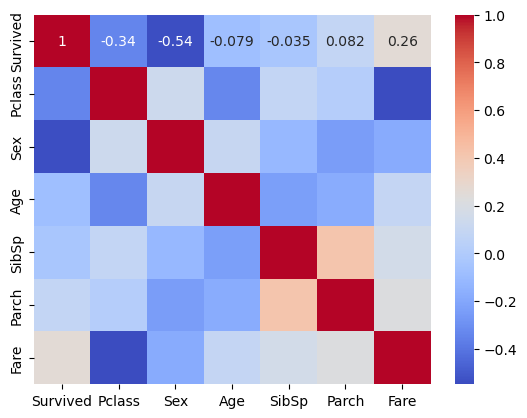

In [118]:
sns.heatmap(df_corr , cmap='coolwarm' , annot=True)

<Axes: xlabel='Pclass', ylabel='Survived'>

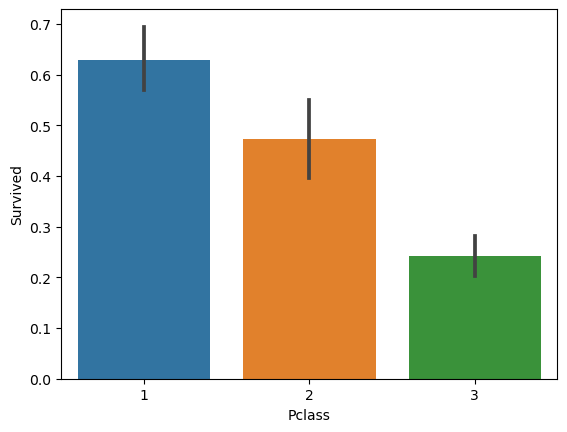

In [126]:
# let find the relationship between Pclass and survival

sns.barplot(df , x='Pclass' , y='Survived')

In [120]:
df.groupby('Pclass')['Survived'].count()

Pclass
1    216
2    184
3    491
Name: Survived, dtype: int64

In [122]:
df.pivot_table(index='Pclass' , columns=['Survived'],aggfunc='count')

Age      Fare      Parch       Sex      SibSp     
Survived    0    1    0    1     0    1    0    1     0    1
Pclass                                                      
1          80  136   80  136    80  136   80  136    80  136
2          97   87   97   87    97   87   97   87    97   87
3         372  119  372  119   372  119  372  119   372  119

In [124]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,1,22.0,1,0,7.2500
1,1,1,0,38.0,1,0,71.2833
2,1,3,0,26.0,0,0,7.9250
3,1,1,0,35.0,1,0,53.1000
4,0,3,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000
887,1,1,0,19.0,0,0,30.0000
888,0,3,0,27.0,1,2,23.4500
889,1,1,1,26.0,0,0,30.0000


### Implementation of Logistic Regression

In [132]:
logisticRegression = LogisticRegression()

In [136]:
logisticRegression

LogisticRegression()

In [140]:
#split up the dataset into target and features and implement train_test_model
X = df.drop("Survived" , axis=1)
y= df["Survived"]

In [146]:
X.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare
0,3,1,22.0,1,0,7.2500
1,1,0,38.0,1,0,71.2833


In [152]:
y.head(2)

0    0
1    1
Name: Survived, dtype: int64

In [159]:
#scaling to dataset X
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler

StandardScaler()

In [161]:
X = scaler.fit_transform(X)
X

array([[ 0.82737724,  0.73769513, -0.58260313,  0.43279337, -0.47367361,
        -0.50244517],
       [-1.56610693, -1.35557354,  0.647095  ,  0.43279337, -0.47367361,
         0.78684529],
       [ 0.82737724, -1.35557354, -0.2751786 , -0.4745452 , -0.47367361,
        -0.48885426],
       ...,
       [ 0.82737724, -1.35557354, -0.19832247,  0.43279337,  2.00893337,
        -0.17626324],
       [-1.56610693,  0.73769513, -0.2751786 , -0.4745452 , -0.47367361,
        -0.04438104],
       [ 0.82737724,  0.73769513,  0.1859582 , -0.4745452 , -0.47367361,
        -0.49237783]])

In [167]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2 , random_state =42)

In [174]:
# train the model for X_train

logisticRegression.fit(X_train , y_train)

LogisticRegression()

In [176]:
#make the prediction
y_pred = logisticRegression.predict(X_test)

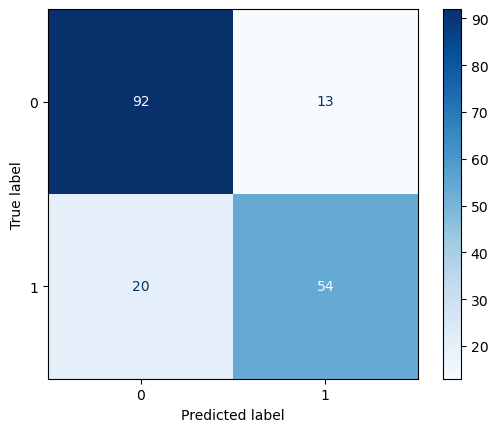

In [178]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues")


In [182]:
print(f"Accuracy Score {accuracy_score(y_test , y_pred)}")

Accuracy Score 0.8156424581005587


In [190]:
from sklearn.metrics  import classification_report
report = classification_report(y_test , y_pred , target_names=["Not Survived","Survived"])
print(report)
#print(classification_report(y_test, y_pred, target_names=["No", "Yes"]))

              precision    recall  f1-score   support

Not Survived       0.82      0.88      0.85       105
    Survived       0.81      0.73      0.77        74

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179



In [194]:
#creating pickle file so we ca use it in stremlite program function

import pickle

# Save the trained model and scaler to disk
with open('titanic_model.pkl', 'wb') as model_file:
    pickle.dump(logisticRegression, model_file)

with open('scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)